# Comparing consistency across different news outlets, over time

In [1]:
import pickle
import datetime

import THESIS2019.utils.to_lexicon as lex
from THESIS2019.utils.base_words import *
import THESIS2019.utils.get_articles as get

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

from importlib import reload

import dit
from dit.divergences import jensen_shannon_divergence

In [36]:
def pickle_dump(outlet, articles, dictionary, corpus, model):
    with open(outlet+"_model2012.pkl","wb") as f:
        pickle.dump(model, f)
    with open(outlet+"_articles2012.pkl","wb") as f:
        pickle.dump(articles, f)
    with open(outlet+"_dictionary2012.pkl","wb") as f:
        pickle.dump(dictionary, f)
    with open(outlet+"_corpus2012.pkl","wb") as f:
        pickle.dump(corpus, f)
        
def pickle_load(outlet):
    path = "../../PART1/TopicModel/LDA/data/"
    with open(path+outlet+"_model2012.pkl","rb") as f:
        model = pickle.load(f)
    with open(path+outlet+"_dictionary2012.pkl","rb") as f:
        dictionary = pickle.load(f)
    with open(path+outlet+"_articles2012.pkl","rb") as f:
        articles = pickle.load(f)
    with open(path+outlet+"_corpus2012.pkl","rb") as f:
        corpus = pickle.load(f)
    return articles, dictionary, corpus, model
    

def get_lda_models(article_set, load=True, store=False):
    arts_list, dictionary_list, corpus_list, model_list = defaultdict(lambda:0),defaultdict(lambda:0),defaultdict(lambda:0),defaultdict(lambda:0)
    
    for outlet, articles in article_set.items():
        print("%s has %d articles" %(outlet, len(articles)))
        
        if load:
            arts, dictionary, corpus, model = pickle_load(outlet)
        else:
            art_set = {outlet:articles}
            arts, dictionary, corpus, model = lex.LDA(art_set, LEFT_WORDS+RIGHT_WORDS,num_topics=30)
            if store:
                pickle_dump(outlet, arts, dictionary, corpus, model)
        
        arts_list[outlet]=arts
        dictionary_list[outlet]=dictionary
        corpus_list[outlet]=corpus
        model_list[outlet]=model
        
    return arts_list, dictionary_list, corpus_list, model_list


In [34]:
# notebook to find consistency over time of topic models using LDA
reload(get)

datapath = "/Users/ninawang/Thesis/remote/THESIS2019/example_data_1000/"
outlets = ['BREITBART','NATIONALREVIEW','FOX',
             'WASHINGTONEXAMINER','REUTERS','NPR',
             'NYT', 'MSN','CNN','SLATE']
articles = get.get_articles_outlets(datapath,outlets,2012,filter_date=False)

for outlet, article in articles.items():
    print("%s has %d articles" %(outlet, len(article)))


BREITBART2012-2013 has 960 articles
NATIONALREVIEW2012-2013 has 986 articles
FOX2012-2013 has 991 articles
WASHINGTONEXAMINER2012-2013 has 949 articles
REUTERS2012-2013 has 999 articles
NPR2012-2013 has 920 articles
NYT2012-2013 has 1000 articles
MSN2012-2013 has 992 articles
CNN2012-2013 has 825 articles
SLATE2012-2013 has 668 articles


In [37]:
reload(lex)
arts_list, dictionary_list, corpus_list, model_list = get_lda_models(articles, load=True, store=False)


BREITBART2012-2013 has 960 articles
NATIONALREVIEW2012-2013 has 986 articles
FOX2012-2013 has 991 articles
WASHINGTONEXAMINER2012-2013 has 949 articles
REUTERS2012-2013 has 999 articles
NPR2012-2013 has 920 articles
NYT2012-2013 has 1000 articles
MSN2012-2013 has 992 articles
CNN2012-2013 has 825 articles
SLATE2012-2013 has 668 articles


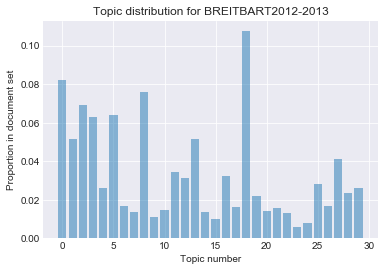

topic 0: israel,  palestinian,  isra,  hama,  gaza
topic 1: iran,  administr,  syria,  iranian,  make
topic 2: govern,  israel,  polit,  even,  state
topic 3: hagel,  vote,  secretari_defens,  support,  israel
topic 4: state_depart,  secur,  attack,  libya,  american
topic 5: attack,  china,  american,  secur,  kill
topic 6: afridi,  pakistan,  appeal,  pakistani,  assaf
topic 7: photo,  benefit,  chavez,  aqim,  explos
topic 8: egypt,  morsi,  muslim_brotherhood,  polit,  administr
topic 9: program,  militari,  travel,  assad,  tantawi
topic 10: hostag,  franc,  mali,  worker,  milit
topic 11: north_korea,  israel,  administr,  cut,  militari
topic 12: muslim,  america,  islam,  jihad,  cia
topic 13: israel,  iran,  china,  militari,  attack
topic 14: cardin,  cathol,  church,  pope,  franci
topic 15: conserv,  event,  jet,  predict,  butterfli
topic 16: attack,  outpost,  american,  enemi,  administr
topic 17: immigr,  gener,  enforc,  border,  crane
topic 18: benghazi,  attack,  que

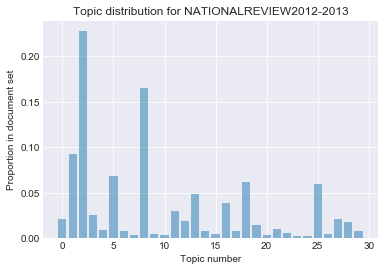

comparing BREITBART2012-2013 and NATIONALREVIEW2012-2013


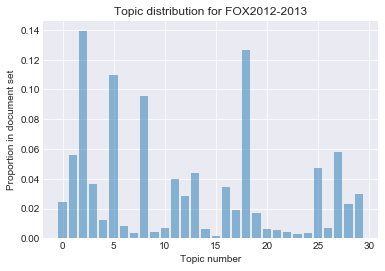

comparing BREITBART2012-2013 and FOX2012-2013


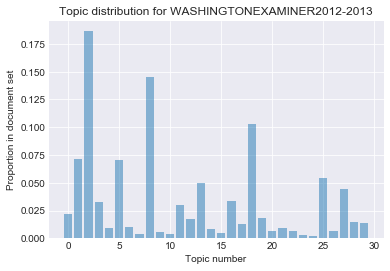

comparing BREITBART2012-2013 and WASHINGTONEXAMINER2012-2013


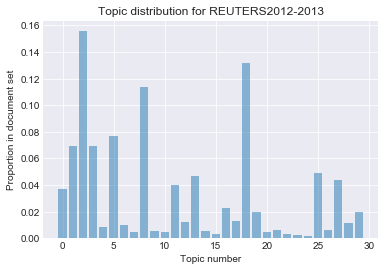

comparing BREITBART2012-2013 and REUTERS2012-2013


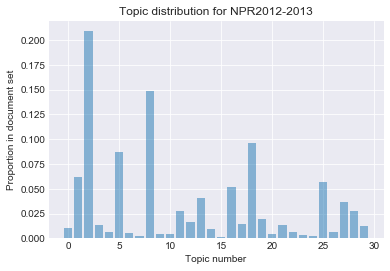

comparing BREITBART2012-2013 and NPR2012-2013


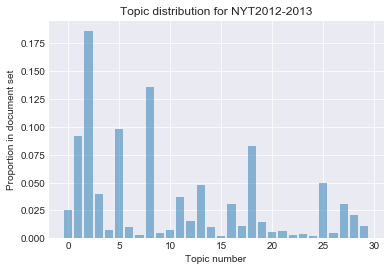

comparing BREITBART2012-2013 and NYT2012-2013


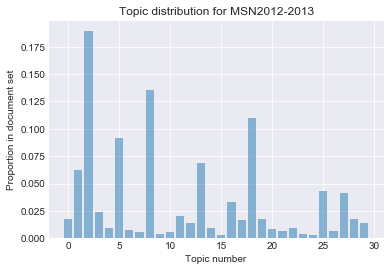

comparing BREITBART2012-2013 and MSN2012-2013


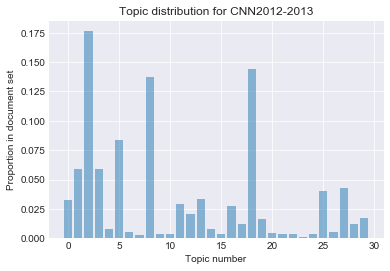

comparing BREITBART2012-2013 and CNN2012-2013


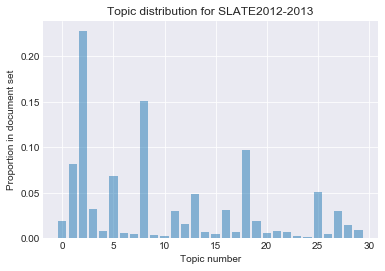

JS Divergence of topic: 0.055197


In [75]:
from THESIS2019.PART1.TopicModel.LDA import lda_consistency as ldac

outlet_list = list(articles.keys())
compare = []
dist_by_outlet=defaultdict(lambda:0)

for i in range(0,len(outlet_list)):
    
    outlet1 = outlet_list[i]
    model1 = model_list[outlet1]
    dist1 = total_topic_distribution(model1, corpus_list[outlet1])
    dictionary1 = dictionary_list[outlet1]
    graph_distribution(dist1, outlet1)
    
    distros = [dist1]
    dist_by_outlet[outlet1]=dist1
    print_topics(model1)
    
    for j in range(len(outlet_list)):
        if j == i:
            continue
            
        print("comparing %s and %s"%(outlet1, outlet2))
        
        outlet2 = outlet_list[j]        
        model2 = model_list[outlet2]
        
        # remake dist 2
        articles2 = list(arts_list[outlet2].values())[0]
        
        dist2 = defaultdict(lambda:0)
        for doc in articles2:
            new_corp = dictionary1.doc2bow(doc)
            v.append(model1[new_corp])
            for ind,prob in model1[new_corp]:
                dist2[ind]+=prob
        s = sum(dist2.values())
        for d in dist2:
            dist2[d] /= s

        graph_distribution(dist2, outlet2)
        dist_by_outlet[outlet2]=dist2
        distros.append(dist2)
        
    jsd = ldac.compare_topic_distributions(distros)
    print("JS Divergence of topic: %f"%(jsd))
    break


        

In [9]:
import nltk

def print_topics(model):
    topics = model.show_topics(num_topics=-1, num_words=5, log=False, formatted=False)
    for idx, topic in topics:
        print ("topic " + str(idx) + ": " + (",  ").join([str(t[0]) for t in topic]))
    
def pairwise_compare_outlets(model1, model2, numtopics=30):
    first0 = model1.show_topic(topicid=0,topn=10)
    second0 = model2.show_topic(topicid=0,topn=10)
    print(first0)
    print(second0)
    scores = []
    for w1,p1 in first0:
        for w2, p2 in second0:
            score = PMI(w1,w2)

In [19]:
# for each topic, compare to other topic

def compare_topics(t1, t2):
    topics = model.show_topics(num_topics=-1, num_words=5, log=False, formatted=False)
    for idx, topic in topics:
        print ("topic " + str(idx) + ": " + (",  ").join([str(t[0]) for t in topic]))
    
    
def compare_model_topics(model1, model2):
    topics1 = model1.show_topics(num_topics=-1, num_words=5, log=False, formatted=False)
    topics2 = model.show_topics(num_topics=-1, num_words=5, log=False, formatted=False)
    

In [58]:
# aggregate topic distribution for a document set
from collections import defaultdict

# total topic distribution for a document set
def total_topic_distribution(model, corpus):
    dist = defaultdict(lambda:0)
    for doc in corpus:
        topics = model[doc]
        for topic,prob in topics:
            dist[topic] += prob  
    # normalize - turn into percentage of total
    s = sum(dist.values())
    for d in dist:
        dist[d] /= s
    return dist

def graph_distribution(dist, title):
    x, y = dist.keys(), dist.values()
    plt.bar(x, y, alpha=0.5)
    plt.xlabel('Topic number')
    plt.ylabel('Proportion in document set')
    plt.title('Topic distribution for %s' %(title))

    plt.show()


Line graph of topic proportions -- by topic

In [49]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

In [123]:
import pandas as pd

# ordered_outlets = ['BREITBART2012-2013','NATIONALREVIEW2012-2013','FOX2012-2013',
#              'WASHINGTONEXAMINER2012-2013','REUTERS-POLITICS2012-2013','NPR2012-2013',
#              'NYT-OPINION2012-2013', 'MSN2012-2013','CNN2012-2013','SLATE2012-2013']
ordered_outlets = ['BREITBART2012-2013','NATIONALREVIEW2012-2013','FOX2012-2013',
             'WASHINGTONEXAMINER2012-2013','NPR2012-2013',
             'NYT-OPINION2012-2013', 'MSN2012-2013','CNN2012-2013']

dist_by_outlet=defaultdict(lambda:0)
for outlet in ordered_outlets:
    articleset=bowarts[outlet]
    print(outlet,len(articleset))
    dist = total_topic_distribution(model, articleset)
    dist_by_outlet[outlet]=dist

# NYT-OPINION2012-2013 275
# BREITBART2012-2013 281
# CNN2012-2013 149
# FOX2012-2013 300
# MSN2012-2013 293
# NATIONALREVIEW2012-2013 289
# NPR2012-2013 280
# REUTERS-POLITICS2012-2013 125
# SLATE2012-2013 131
# WASHINGTONEXAMINER2012-2013 286

BREITBART2012-2013 960
NATIONALREVIEW2012-2013 986
FOX2012-2013 991
WASHINGTONEXAMINER2012-2013 949
NPR2012-2013 920


KeyError: 'NYT-OPINION2012-2013'

In [76]:
# to pd
import pandas as pd
df = pd.DataFrame(dist_by_outlet)

In [77]:
df

,BREITBART2012-2013,NATIONALREVIEW2012-2013,FOX2012-2013,WASHINGTONEXAMINER2012-2013,REUTERS2012-2013,NPR2012-2013,NYT2012-2013,MSN2012-2013,CNN2012-2013,SLATE2012-2013
0,0.082193,0.020909,0.024209,0.022265,0.036738,0.010776,0.025173,0.017678,0.032780,0.019206
1,0.051514,0.092813,0.056237,0.071022,0.069692,0.061548,0.092174,0.062312,0.059388,0.081279
2,0.069093,0.227391,0.139139,0.186432,0.155633,0.208834,0.186009,0.189062,0.176234,0.227710
3,0.062862,0.025409,0.036293,0.032988,0.069324,0.013118,0.040002,0.024007,0.059291,0.032538
4,0.026299,0.009490,0.012203,0.009163,0.008406,0.006835,0.007486,0.009033,0.007676,0.008446
5,0.064041,0.068084,0.109572,0.070301,0.076916,0.086870,0.098546,0.091609,0.083353,0.068201
6,0.016684,0.007640,0.008343,0.010369,0.010008,0.005305,0.010233,0.007554,0.005394,0.005945
7,0.013474,0.003187,0.003490,0.004170,0.004466,0.002334,0.002670,0.005432,0.003207,0.004222
8,0.075748,0.165194,0.095492,0.144991,0.113923,0.148678,0.135514,0.135109,0.137518,0.150810
9,0.011309,0.005112,0.004563,0.005861,0.005552,0.004414,0.004791,0.003753,0.003754,0.003317


In [78]:
df=df.T

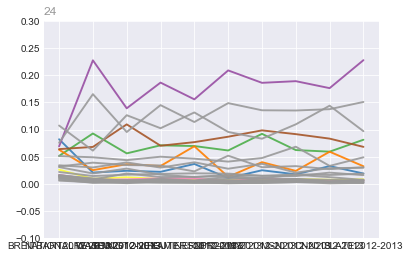

In [83]:
# multiple line plot
num=0
for column in df:
    num+=1
 
    # Find the right spot on the plot
#     plt.subplot(5,5, num)
 
    # Plot the lineplot
    x = df.index.values
    plt.plot(x, df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-.1,.3)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==25:
        break
 
